In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(color_codes=True) 
mpl.rcParams['figure.figsize']=[15,5] 
#read combined csv
df=pd.read_csv("hktvmall_combine.csv", index_col=0) 

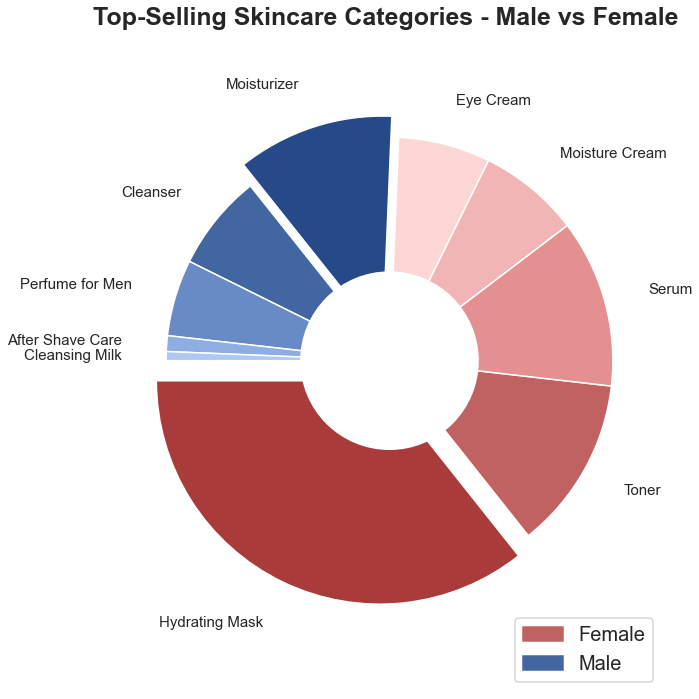

<Figure size 1080x360 with 0 Axes>

In [6]:
#1- Top-Selling Skincare Categories by Gender - HKTVmall

plt.figure(figsize=(10,10))
labels_cat = ['Hydrating Mask', 'Toner', 'Serum', 'Moisture Cream',
                    'Eye Cream', 'Moisturizer', 'Cleanser','Perfume for Men','After Shave Care','Cleansing Milk']
sizes_cat = [94.54124142, 33.15179679, 32.23881277, 19.45703649, 17.61111252, 30.1082206, 18.46826223, 14.68262227, 3.007284079, 1.733610822]

colors_cat = ['#A93B3B', '#C16262', '#E49090', '#F1B5B5',
                    '#FED6D6','#254A87', '#4266A1','#688BC6','#8EADE1','#AFC8F3']
explode = (0.1,0,0,0,0,0.1,0,0,0,0)

my_pie, pct_txts = plt.pie(sizes_cat, labels=labels_cat,
                  colors=colors_cat, radius=1,
                  startangle=180, labeldistance=(1.2), explode=explode, textprops={'size': 15} )


centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#C16262', label='Female')
blue_patch = mpatches.Patch(color='#4266A1', label='Male')
plt.legend(handles=[red_patch,blue_patch],loc=4,fontsize=20)
plt.title("Top-Selling Skincare Categories - Male vs Female",fontweight="bold" ,fontsize="25")
plt.axis('equal')


plt.tight_layout()

plt.show()
#Save figure
plt.savefig("hktvmall_topcategory_by_gender.png")

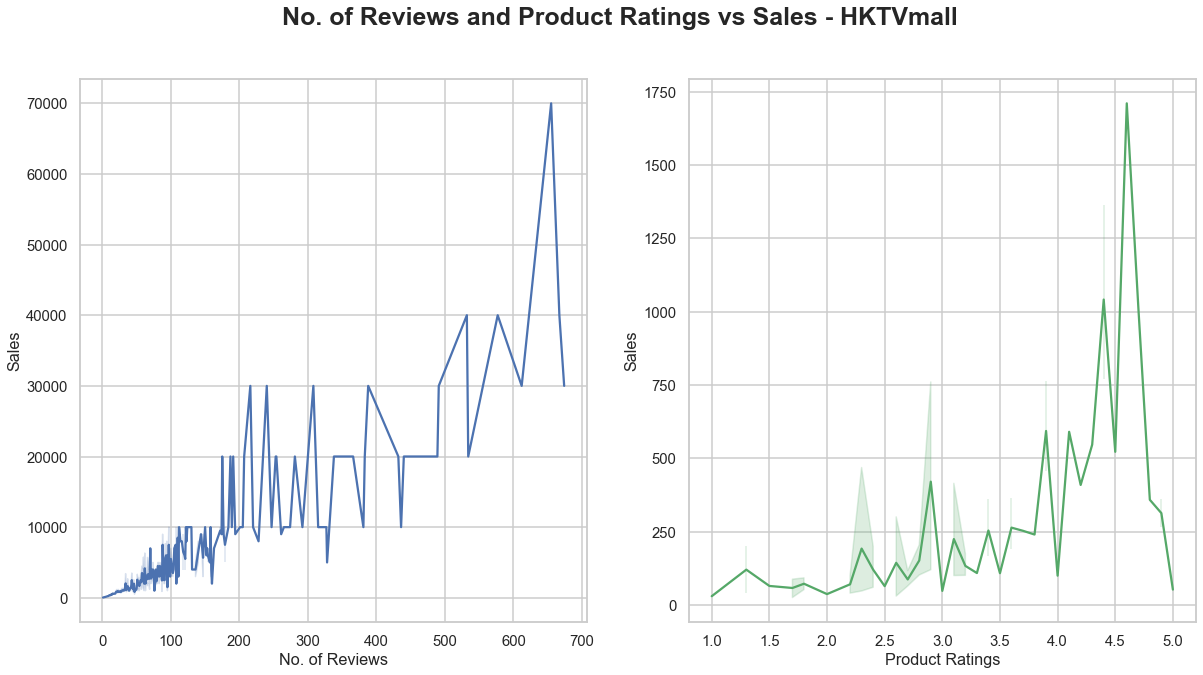

In [5]:
#Review Volume & Star Ratings’ Impacts on Sales - HKTVmall
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.9)
fig,axes=plt.subplots(ncols=2, figsize=[20,10])

review=sns.lineplot(data=df,x='Review',y='Sales',ax=axes[0], color="b")
rating=sns.lineplot(data=df,x='Rating',y='Sales',ax=axes[1], color="g")

axes[0].set_xlabel("No. of Reviews")
axes[1].set_xlabel("Product Ratings")
fig.suptitle("No. of Reviews and Product Ratings vs Sales - HKTVmall", fontweight ="bold", fontsize='25')

#save figure
plt.savefig("hktvmall_review_and_rating.png")

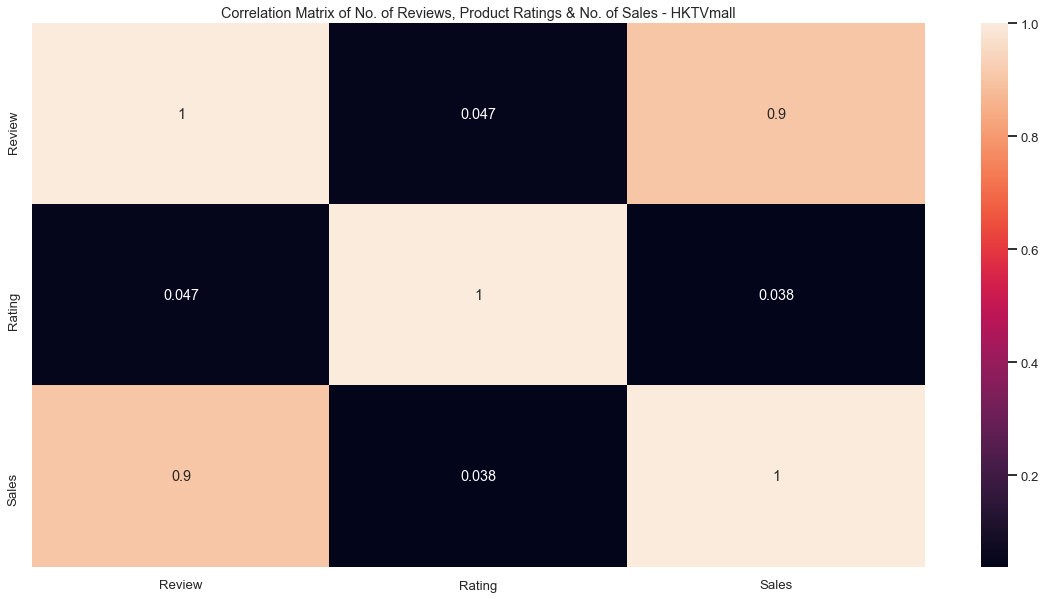

In [14]:
#3- Correlation Matrix of No. of Reviews, Product Ratings & No. of Sales - HKTVmall
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)
plt.subplots(figsize=(20,10))

corr_matrix=df[["Review", "Rating", "Sales"]].corr()
sns.heatmap(corr_matrix, annot=True).set(title="Correlation Matrix of No. of Reviews, Product Ratings & No. of Sales - HKTVmall")

#save figure
plt.savefig('hktvmall_sales_heatmap.png')

Text(0.5, 0.98, 'Number of Products vs. Sales by Category')

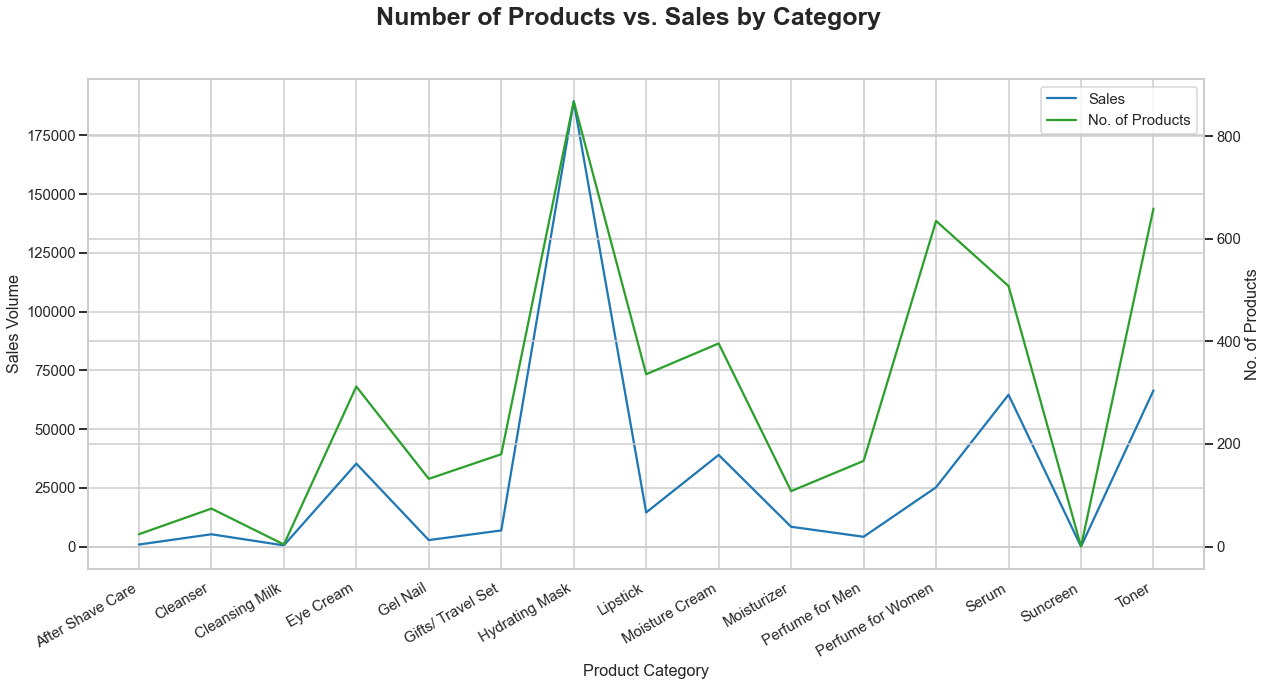

In [12]:
#4- Number of products vs. Sales by category
df2=df[df["Product Category"]!="Others"]

from matplotlib.ticker import LinearLocator
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.9)

fig,ax1= plt.subplots(figsize=[20,10])
ax2=ax1.twinx()

N = 6

ax1.xaxis.set_major_locator(LinearLocator(N))
ax2.xaxis.set_major_locator(LinearLocator(N))

b=df2.groupby('Product Category')["Sales"].sum().plot(kind='line',ax=ax1,color='tab:blue')
c=df2.groupby("Product Category").count().reset_index()[["Product Category"]+['Sales']].plot(kind='line',ax=ax2,color='tab:green')

ax1.set(ylabel="Sales Volume")
ax2.set(ylabel="No. of Products")
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

labels2 = ['No. of Products']
ax2.legend(lines + lines2, labels + labels2, loc=0)

tick_labels = tuple(df2.groupby("Product Category").count().reset_index()["Product Category"])

x_max = int(max(plt.xticks()[0])) 

plt.xticks(range(0, x_max + 1), tick_labels, rotation=45) 
fig.autofmt_xdate()
fig.suptitle('Number of Products vs. Sales by Category', fontweight ="bold", fontsize='25') 

#save graph
plt.savefig('hktvmall_variety_vs_sales_by_product_category.png')

Text(0.5, 1.0, 'Promotional Tag vs. Sales - HKTVmall')

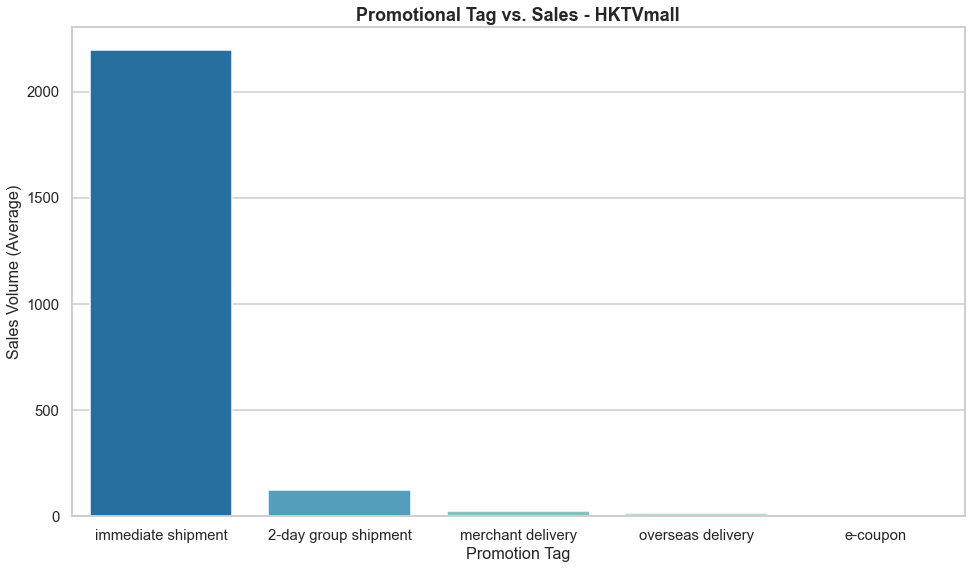

In [13]:
#5- Promotional Tag vs. Sales - HKTVmall
df_promo=df.groupby("Promo Tag", as_index=False)["Sales"].mean().sort_values("Sales", ascending=False)

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.9)
plt.figure(figsize=(16,9))
sns.barplot(x="Promo Tag", y="Sales", data=df_promo, palette = "GnBu_r")

plt.ylabel('Sales Volume (Average)')
plt.xlabel('Promotion Tag')
plt.title("Promotional Tag vs. Sales - HKTVmall", fontweight="bold", fontsize=18)
#save figure
plt.savefig('hktvmall_promomsg.png')

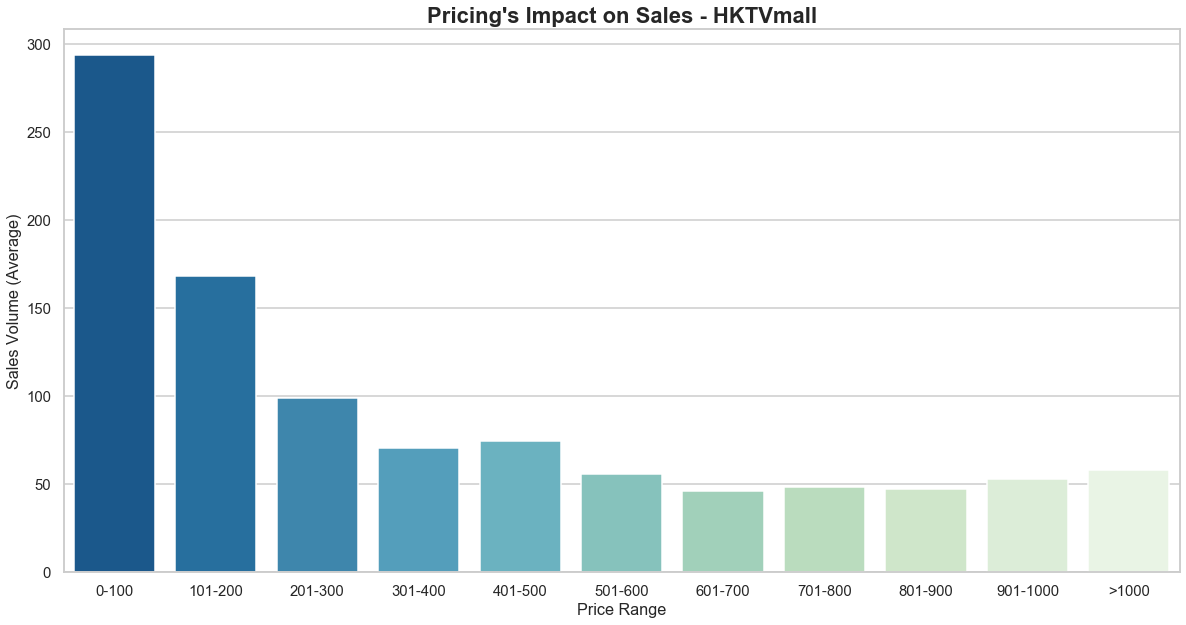

In [153]:
#6- Price vs Sales - HKTVmall
df_price=df.groupby("Price Range", as_index=False)["Sales"].mean().sort_values("Price Range", ascending=True)

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.9)
plt.figure(figsize=(20,10))
sns.barplot(x="Price Range", y="Sales", data=df_price, palette = "GnBu_r")

plt.ylabel('Sales Volume (Average)')
plt.title("Pricing's Impact on Sales - HKTVmall", fontweight="bold",fontsize='22')
#Save figure
plt.savefig('hktvmall_pricing.png')

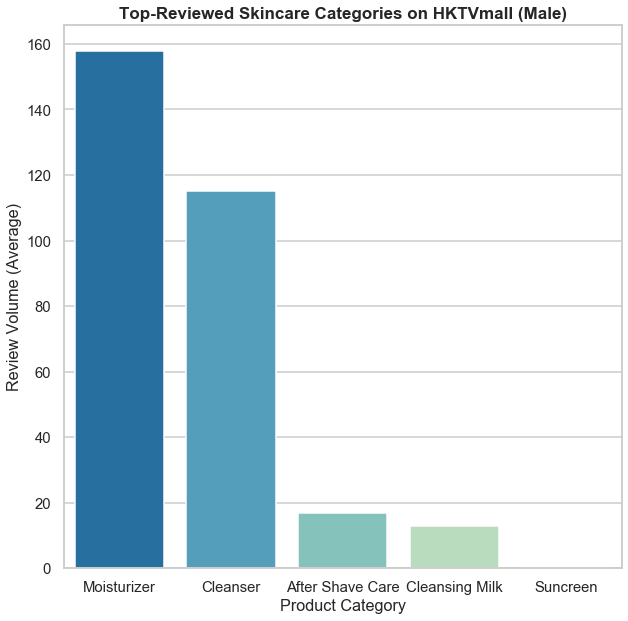

In [154]:
#7- Top-Reviewed Skincare Categories -HKTVmall
df_select=df[(df["Male_only"]=="Male") & (df["Product Category"]!="Others")]
df_hktv_review=df_select.groupby("Product Category", as_index=False)["Review"].sum().sort_values("Review", ascending=False).head()

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.9)
plt.figure(figsize=(10,10))
sns.barplot(x="Product Category", y="Review", data=df_hktv_review, palette = "GnBu_r")

plt.ylabel('Review Volume (Average)')
plt.title('Top-Reviewed Skincare Categories on HKTVmall (Male)', fontweight="bold",fontsize='17')
#Save figure
plt.savefig('hktvmall_topreviewed_categories.png')

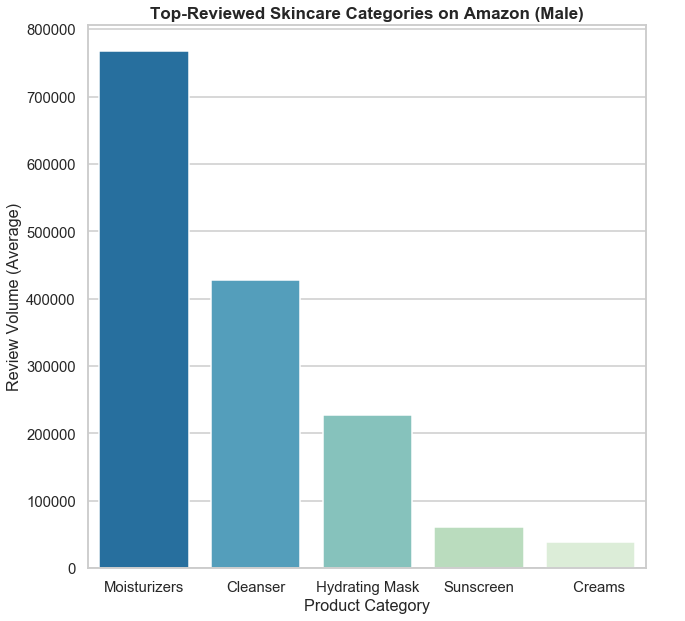

In [155]:
#Top-Reviewed Skincare Categories -Amazon
df_amazon=pd.read_csv('cleaned_amazon.csv',index_col=0)
df_amazon_review=df_amazon.groupby("Product Category", as_index=False)["Review"].sum().sort_values("Review", ascending=False).head()

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.9)
plt.figure(figsize=(10,10))
sns.barplot(x="Product Category", y="Review", data=df_amazon_review, palette = "GnBu_r")

plt.ylabel('Review Volume (Average)')
plt.title('Top-Reviewed Skincare Categories on Amazon (Male)', fontweight="bold",fontsize='17')
#save figure
plt.savefig('amazon_topreviewed_categories.png')